In [2]:
import numpy as np
import pandas as pd
import glob
import os
import sys
import matplotlib.pyplot as plt
import torch
import matplotlib.gridspec as gridspec
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
import pickle
# Usage example:
saved_dataset = '/scratch/tappay01/custom_dataset.pkl'
#with open(saved_dataset, 'wb') as file:
#    pickle.dump(combined_dataset, file)
#Later, when you want to use the dataset again, you can load it from the file
with open(saved_dataset, 'rb') as file:
   combined_dataset = pickle.load(file)

In [4]:
BATCH_SIZE = 32 #To be 32 according to paper

In [5]:
from torch.utils.data import ConcatDataset, random_split
from torch.utils.data import DataLoader

print('Total data :',len(combined_dataset))
# Split combined dataset into train, validation, and test
train_size = int(0.8 * len(combined_dataset))
valid_size = int(0.1 * len(combined_dataset))
test_size = len(combined_dataset) - (train_size + valid_size)

train_subset, val_subset, test_subset = random_split(combined_dataset, [train_size, valid_size, test_size])

# Turn train, val and test custom Dataset into DataLoader's
train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8) #creates 8 worker processes to load the data in parallel. 
val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)
test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

print("Total number of samples in the train dataset:", len(train_subset))
print("Number of batches:", len(train_loader))
print("Total number of samples in the validation dataset:", len(val_subset))
print("Number of batches:", len(val_loader))
print("Total number of samples in the test dataset:", len(test_subset))
print("Number of batches:", len(test_loader))

Total data : 1122
Total number of samples in the train dataset: 897
Number of batches: 29
Total number of samples in the validation dataset: 112
Number of batches: 4
Total number of samples in the test dataset: 113
Number of batches: 4


In [6]:
# Get one batch from the loader
data_batch, condition_batch, water_batch, density_batch, data_name_batch = next(iter(val_loader))

# Print the shapes
print("Data batch shape:", data_batch.shape)
print("Condition batch shape:", condition_batch.shape)
print("Water batch shape:", water_batch.shape)
print("Density batch shape:", density_batch.shape)
print("Data name batch shape:", len(data_name_batch))

Data batch shape: torch.Size([32, 1, 16, 16, 128])
Condition batch shape: torch.Size([32, 2, 16, 16, 128])
Water batch shape: torch.Size([32, 1, 16, 16, 128])
Density batch shape: torch.Size([32, 1, 16, 16, 128])
Data name batch shape: 32


(7, 7, 48)


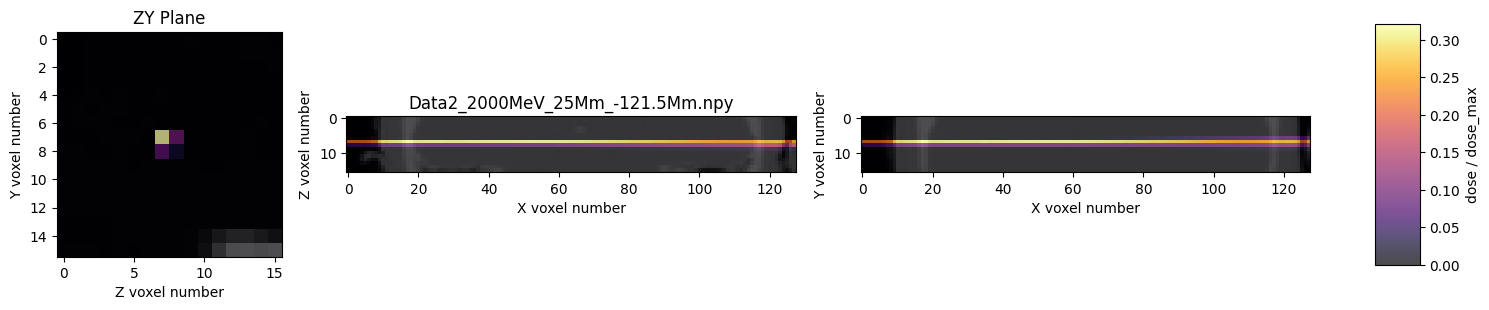

(7, 8, 48)


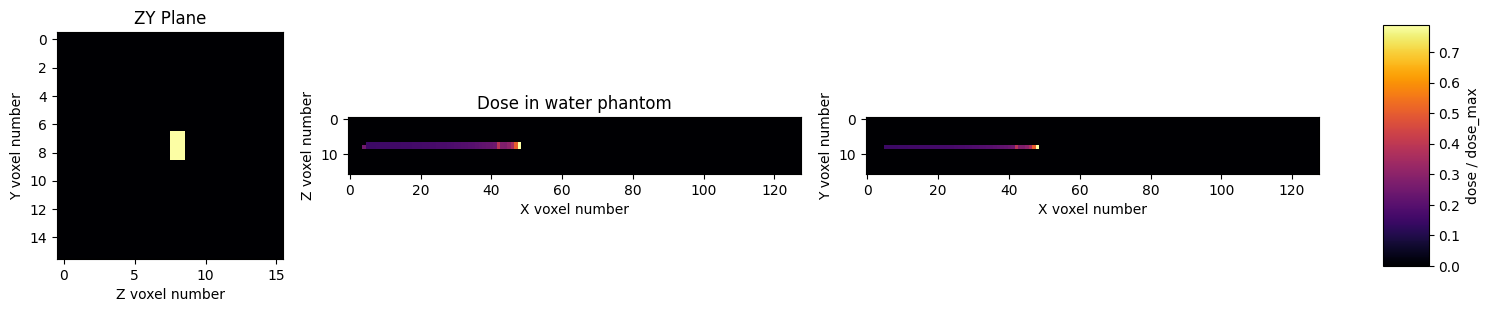

(7, 8, 118)


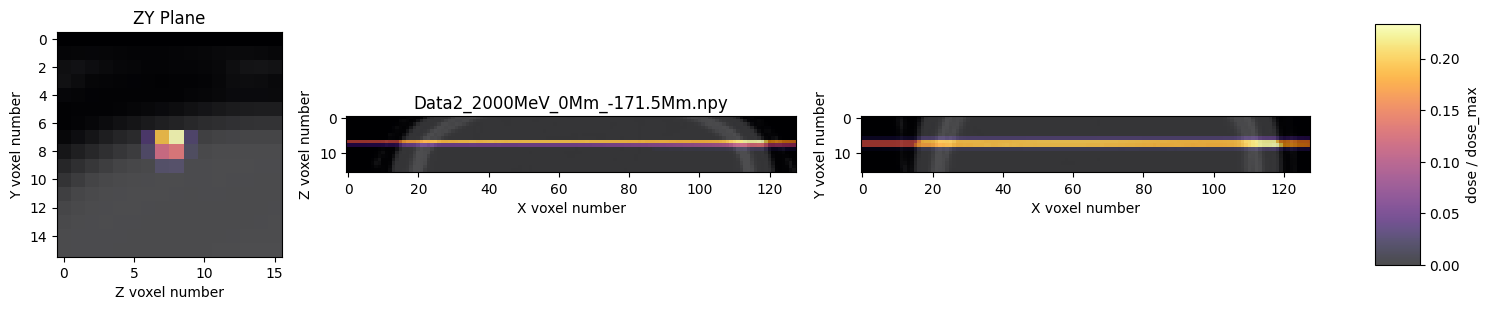

(7, 8, 48)


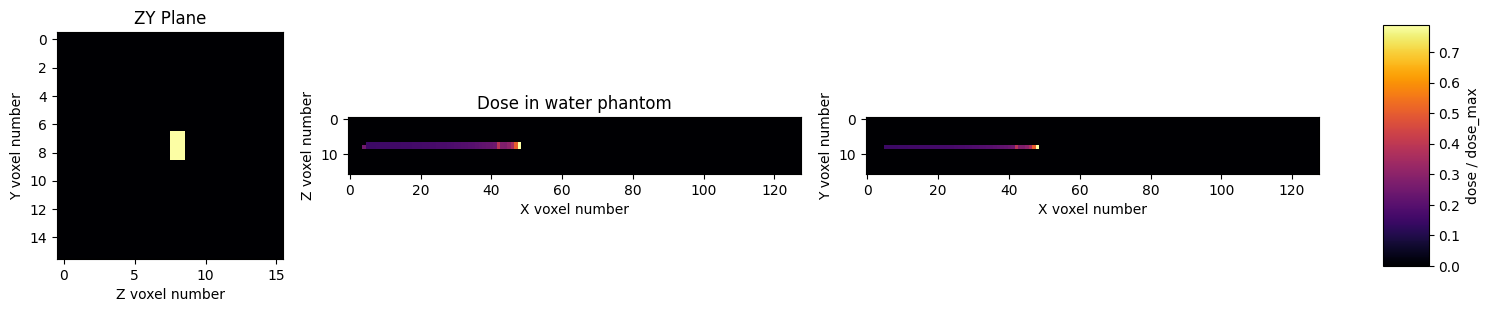

(7, 8, 21)


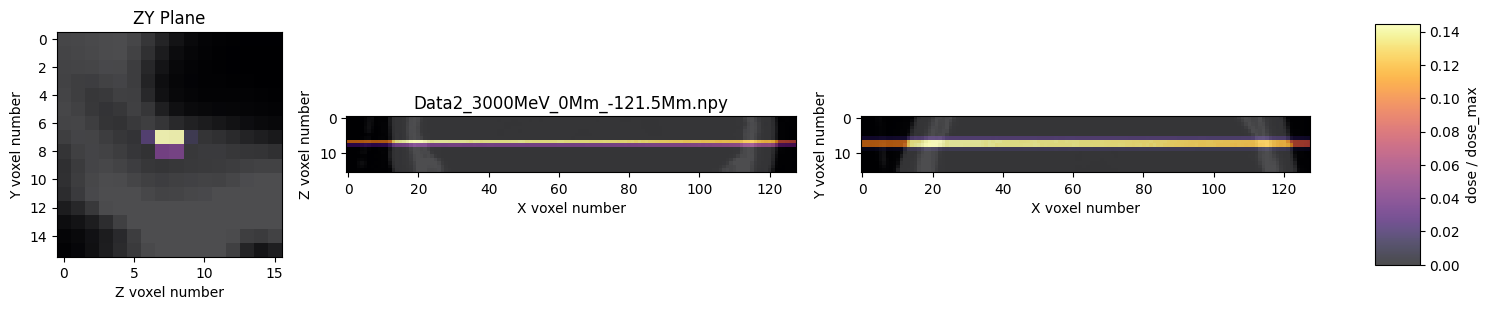

(8, 8, 93)


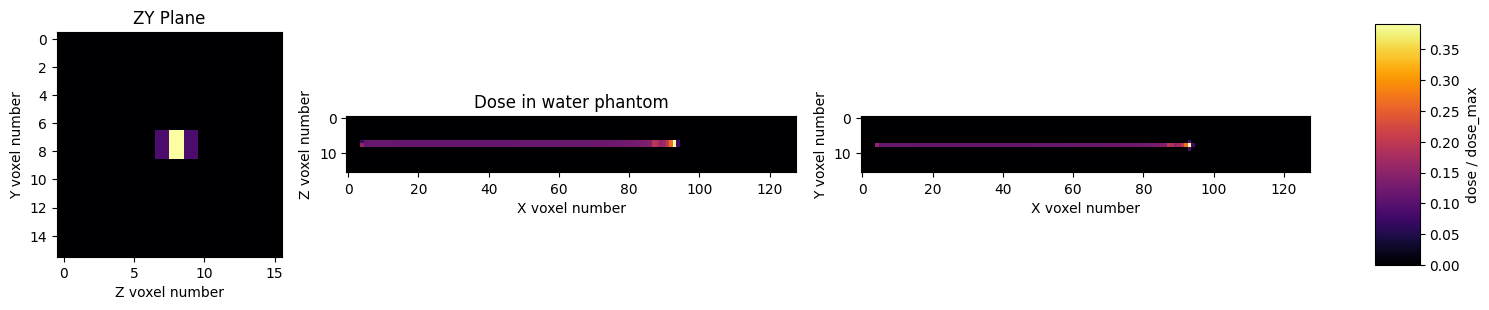

(7, 7, 21)


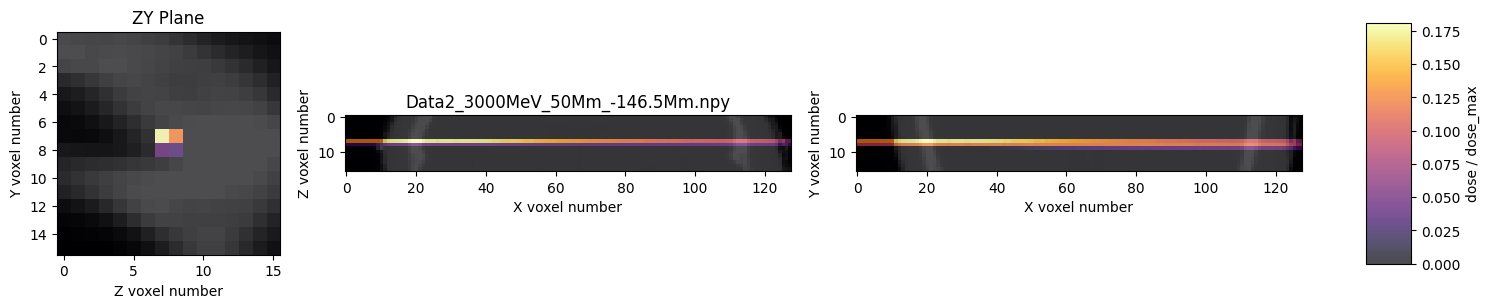

(8, 8, 93)


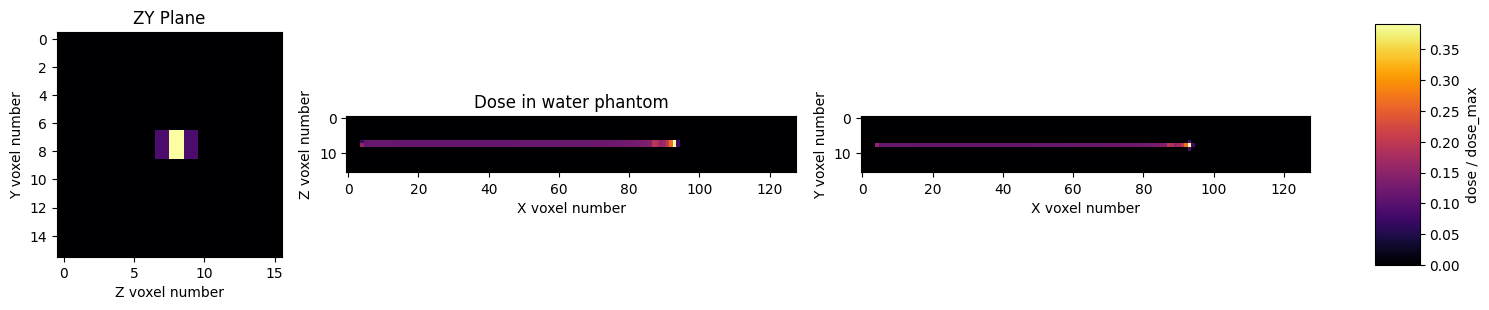

(7, 7, 21)


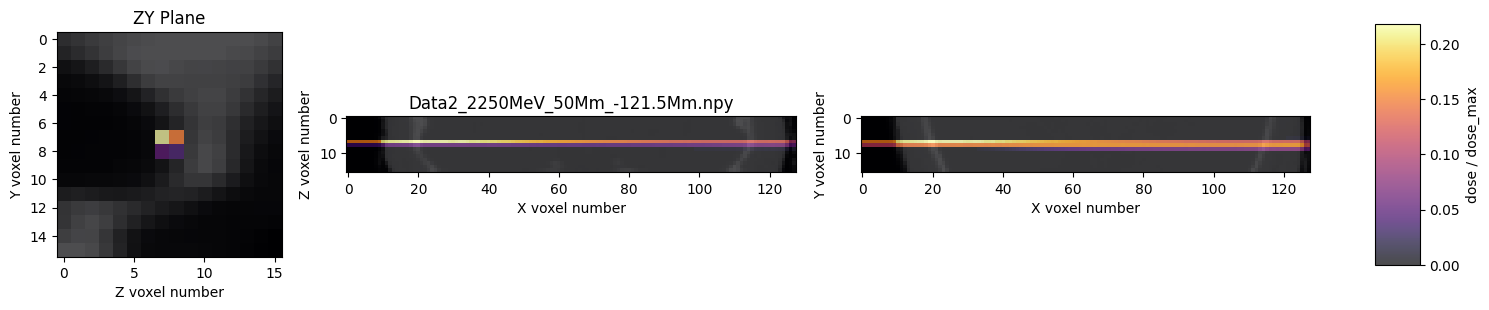

(7, 8, 58)


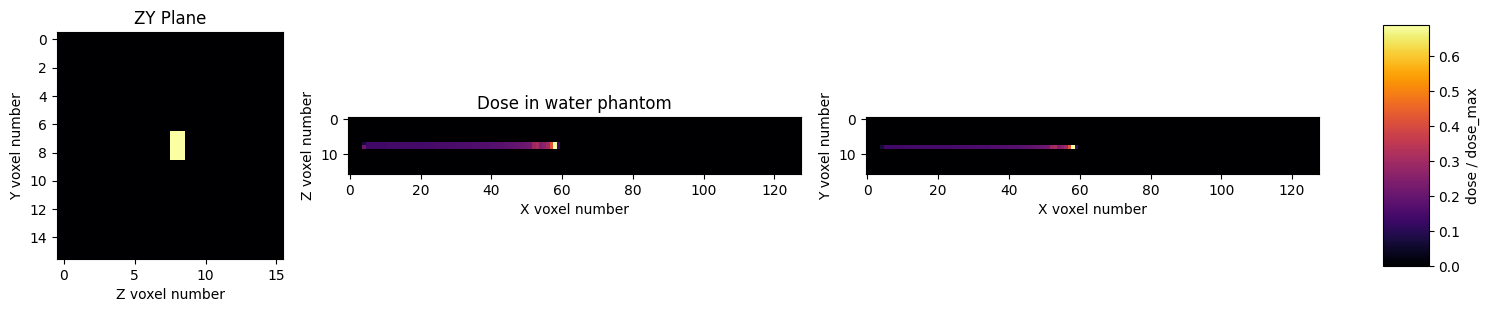

(7, 8, 20)


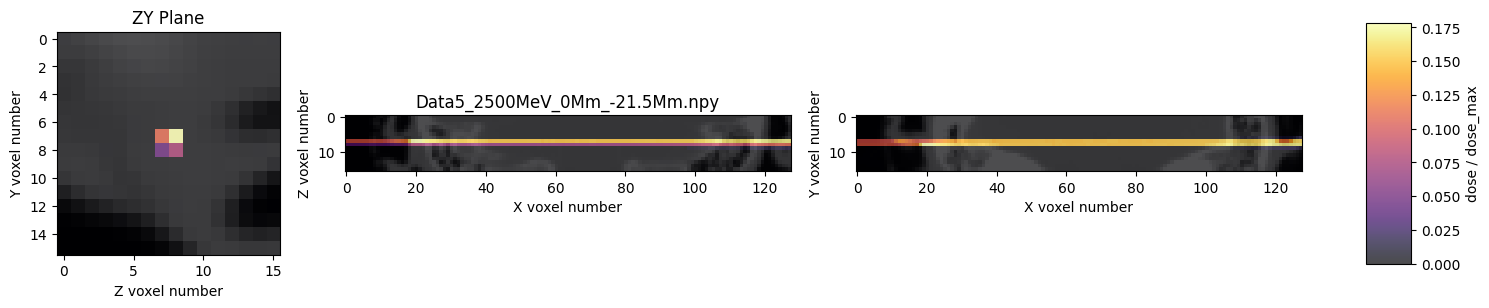

(7, 8, 69)


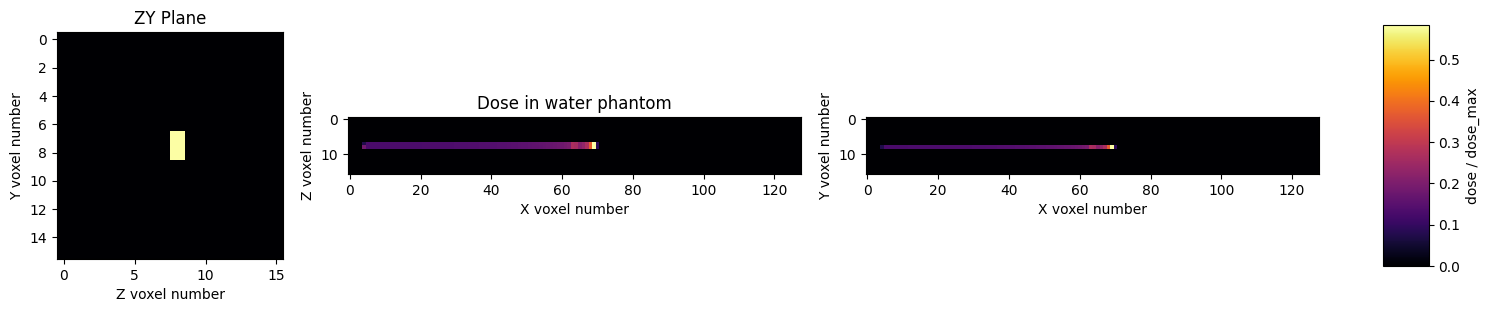

(8, 8, 43)


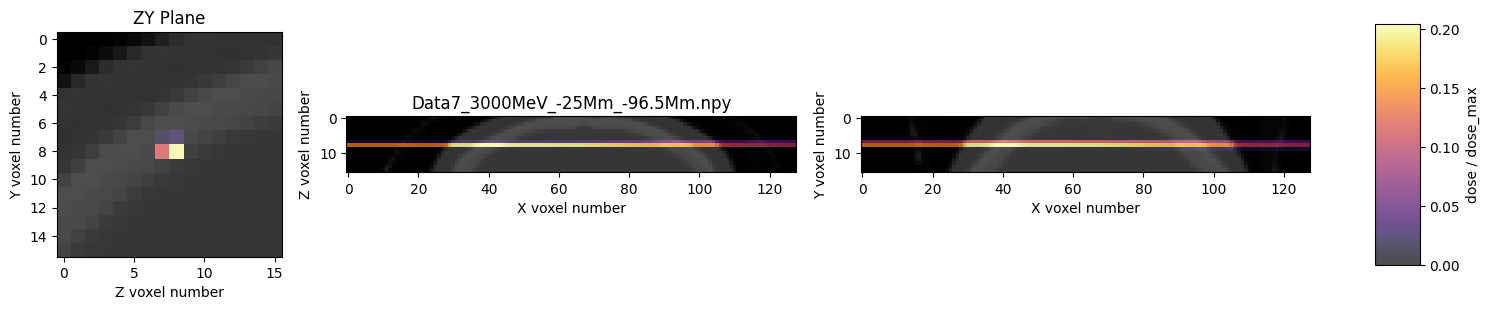

(8, 8, 93)


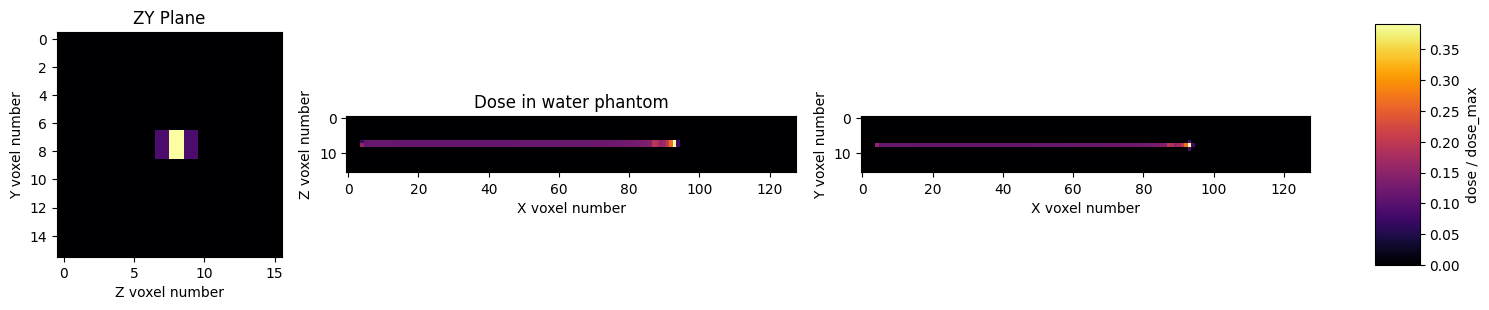

(7, 8, 68)


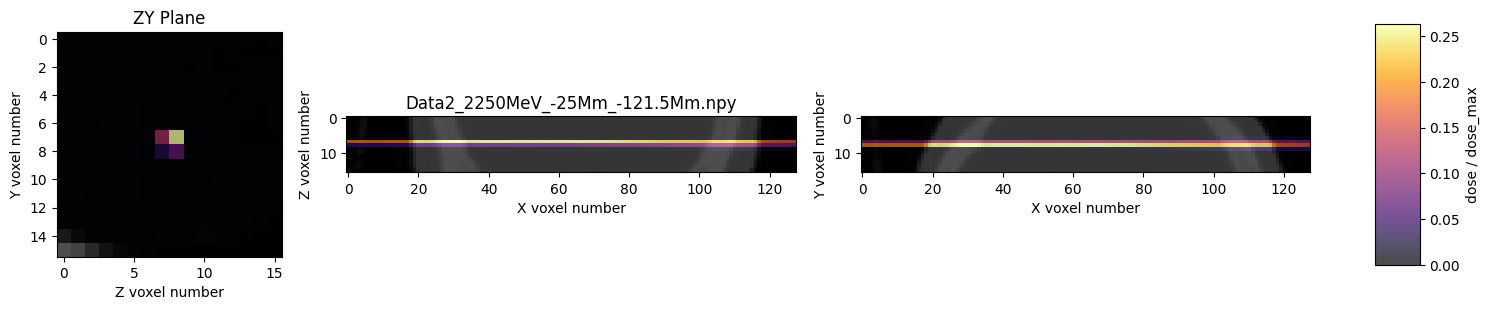

(7, 8, 58)


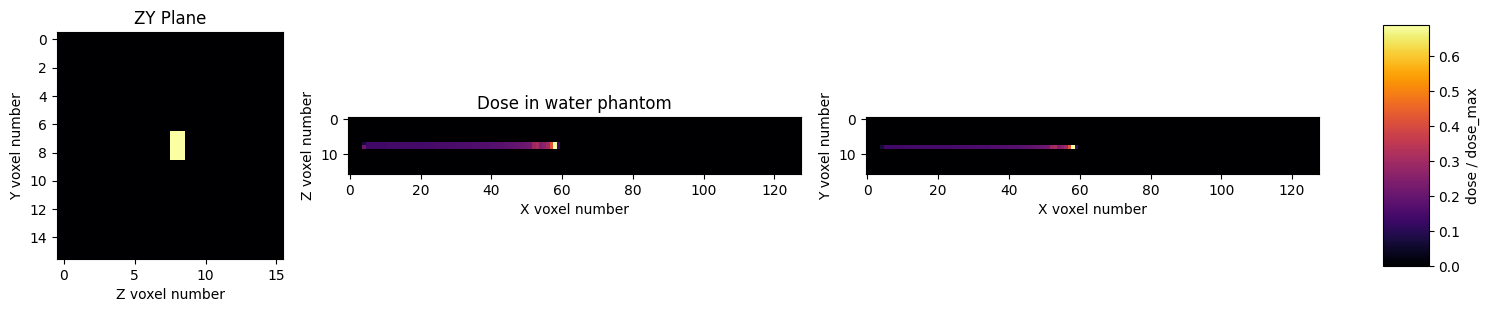

(7, 7, 62)


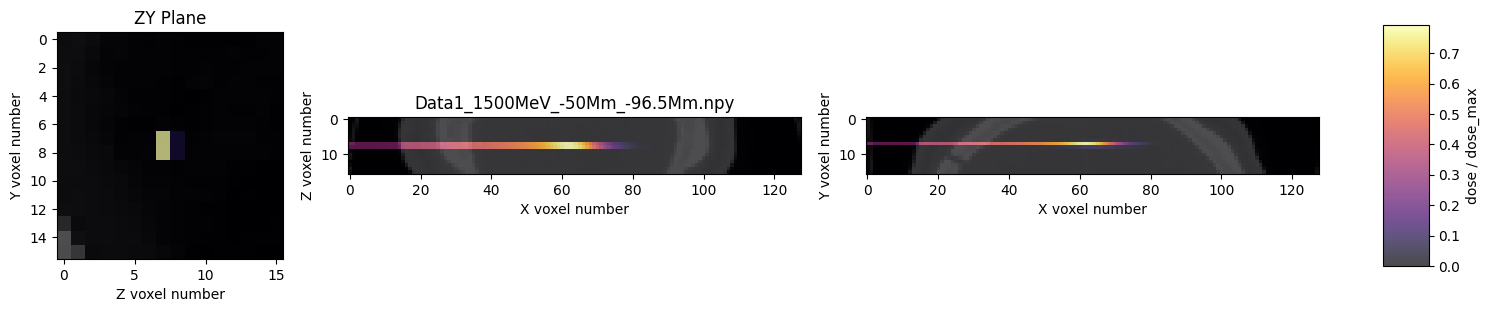

(8, 8, 30)


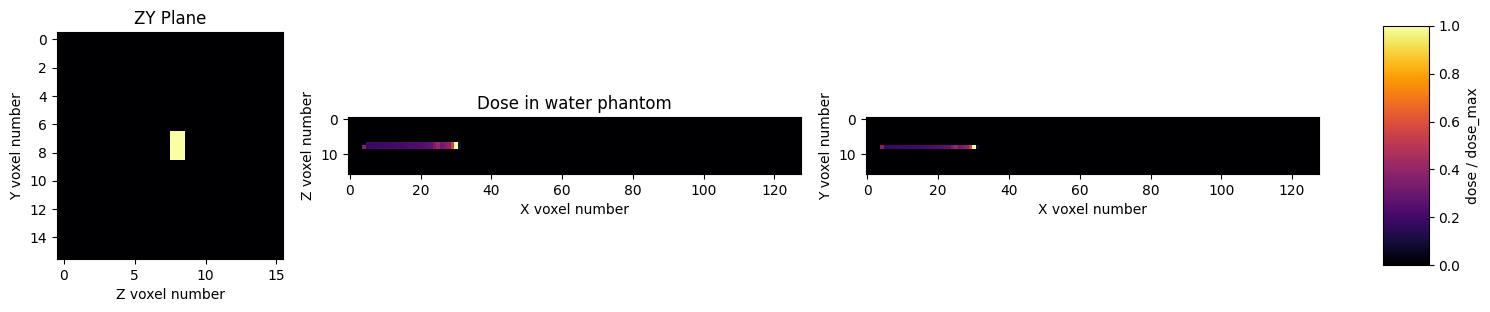

(8, 8, 103)


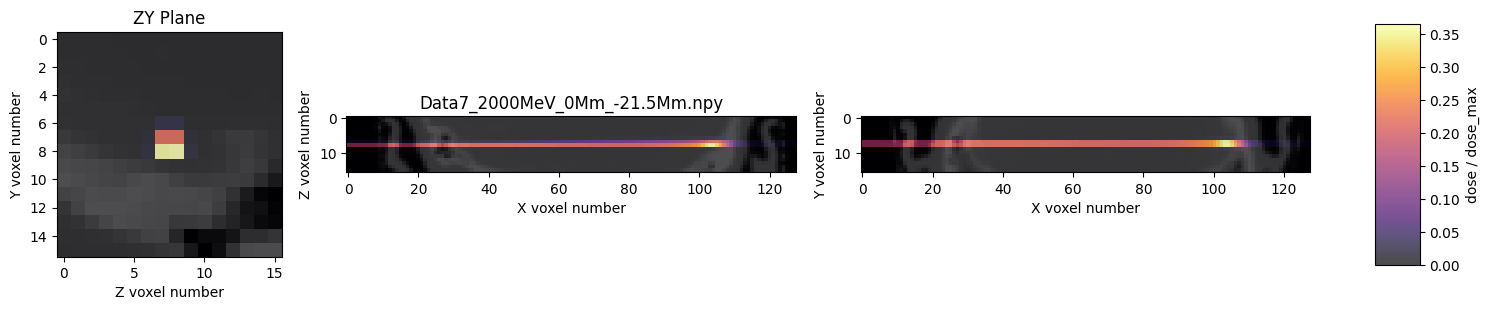

(7, 8, 48)


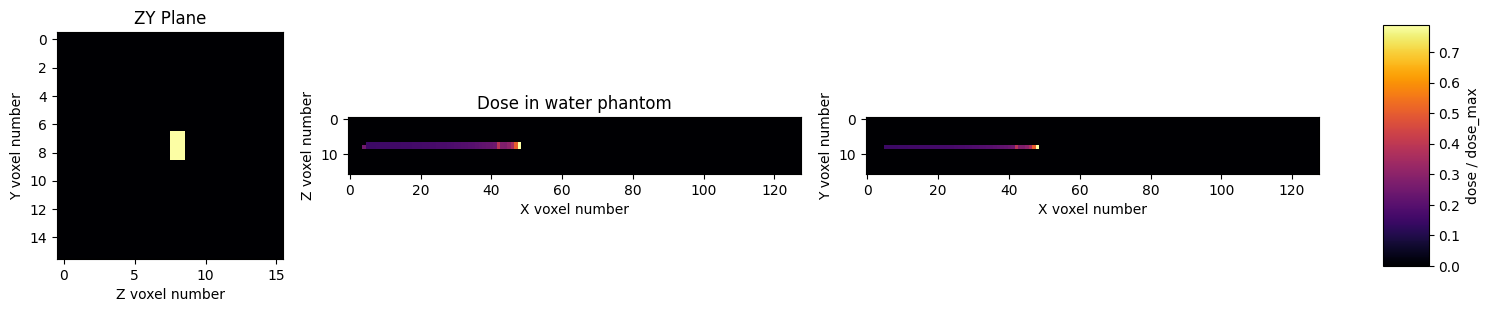

(8, 8, 78)


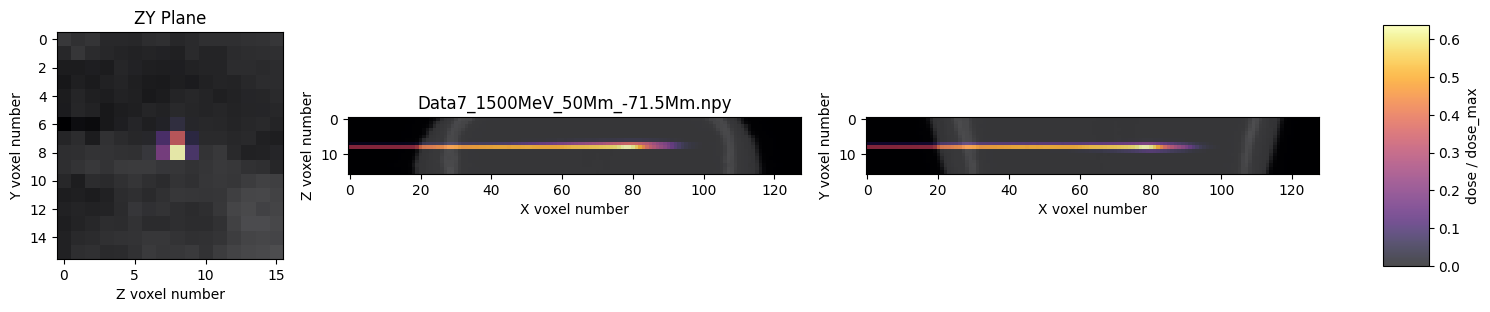

(8, 8, 30)


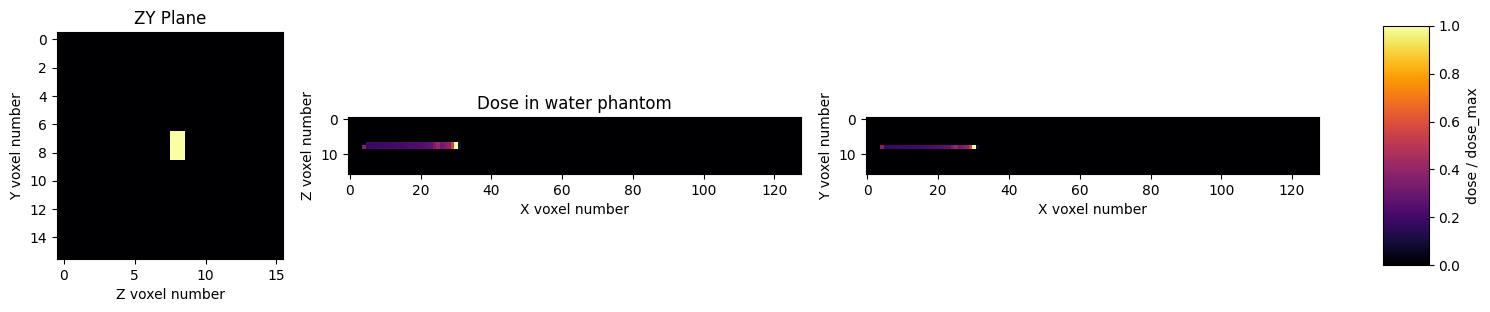

(7, 8, 81)


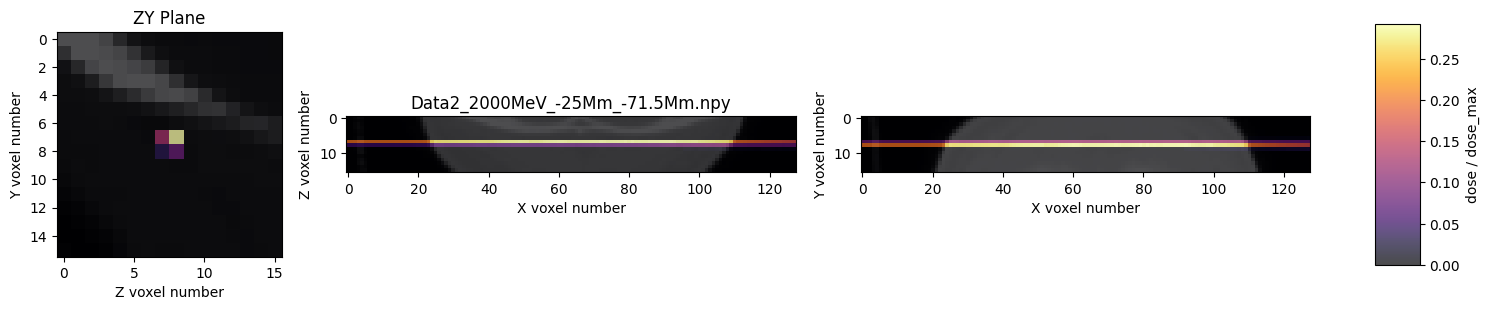

(7, 8, 48)


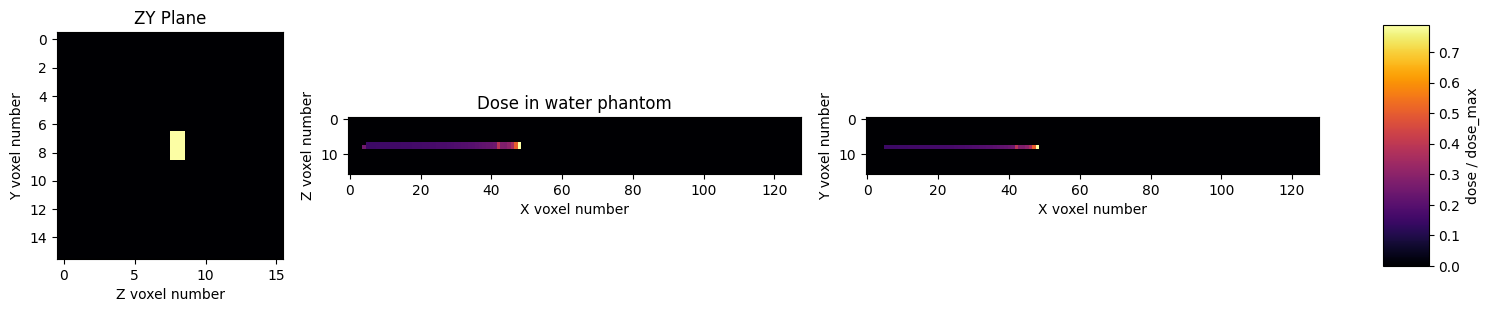

(7, 8, 117)


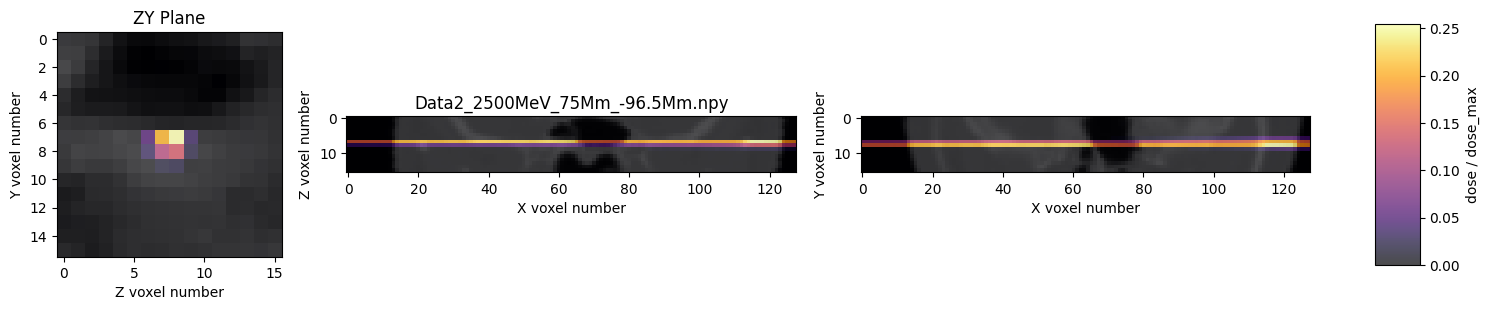

(7, 8, 69)


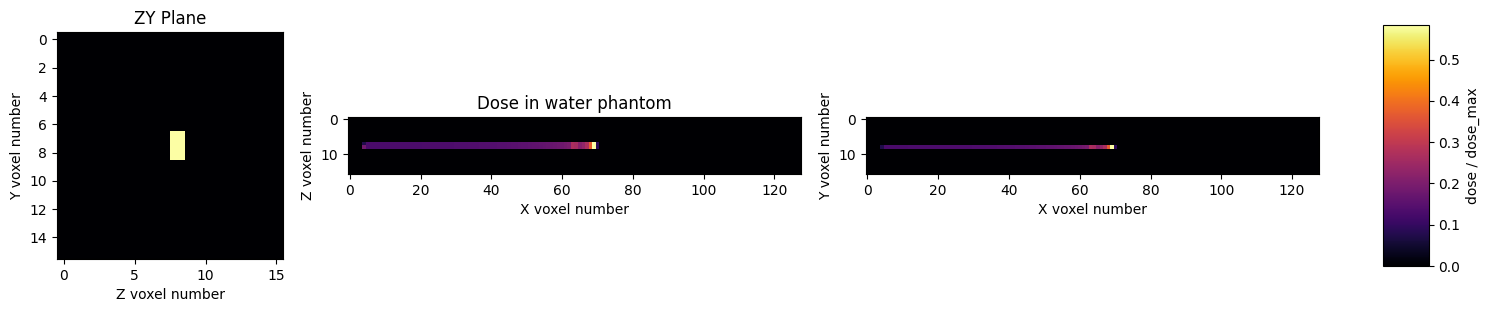

(7, 7, 2)


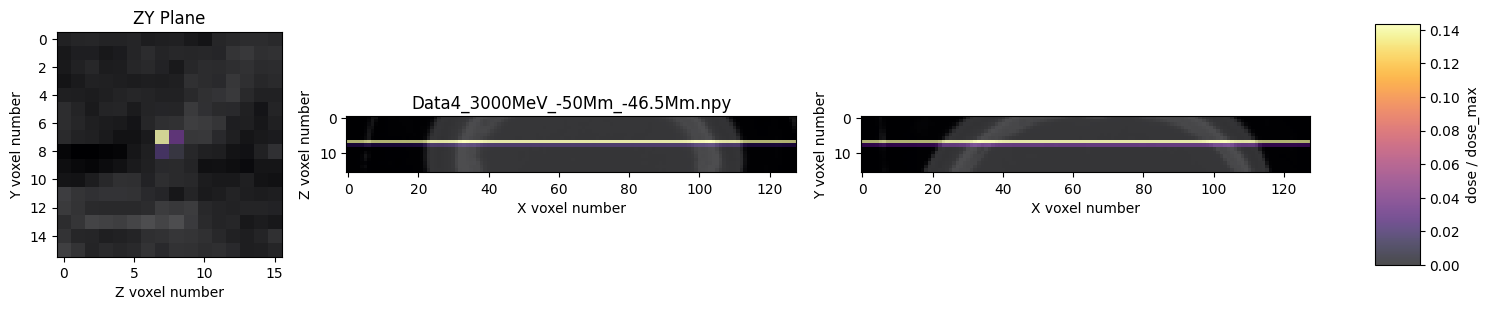

(8, 8, 93)


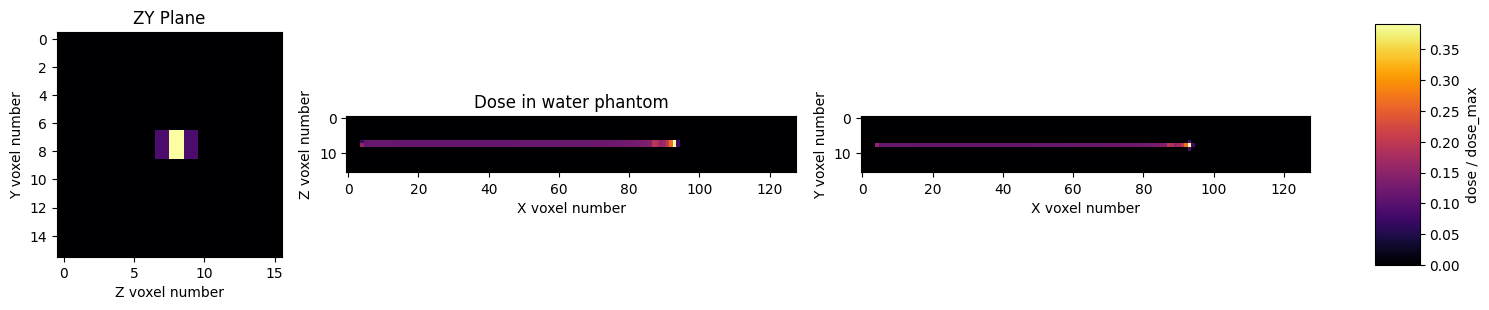

(7, 8, 22)


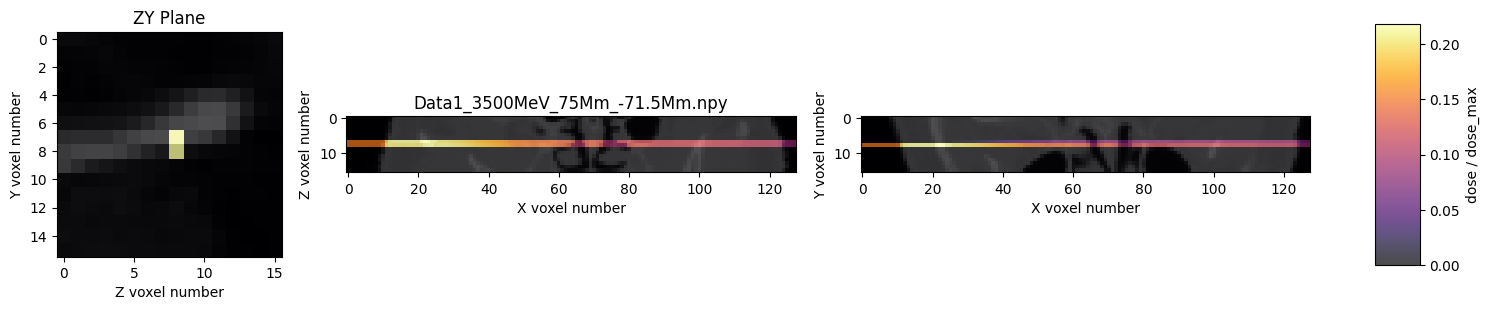

(8, 8, 119)


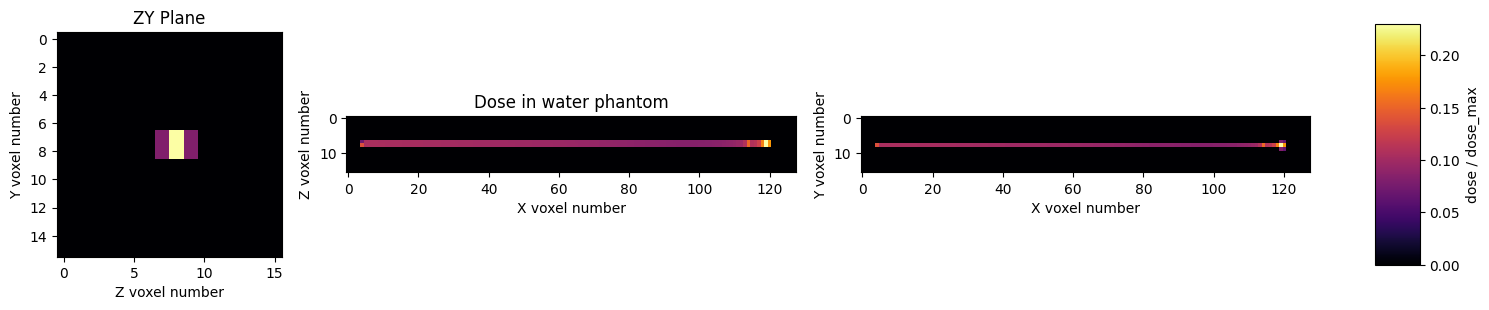

(7, 7, 63)


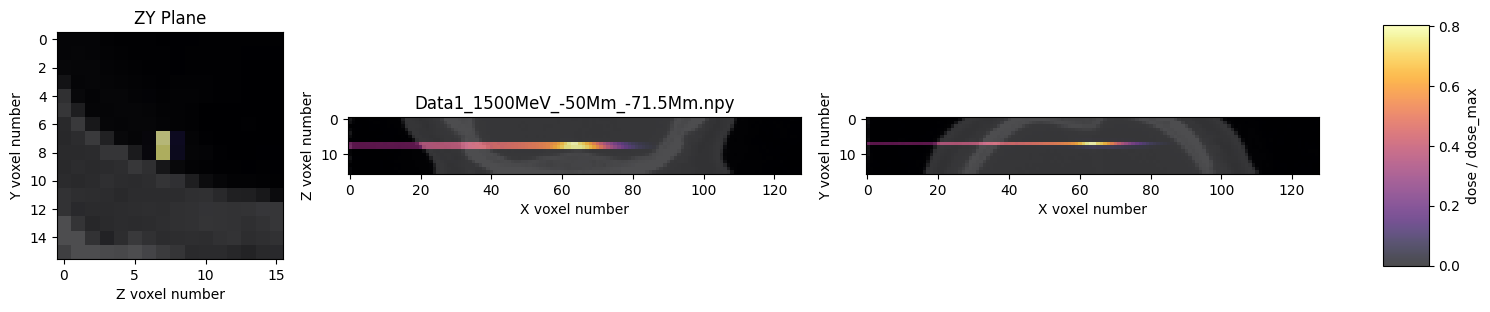

(8, 8, 30)


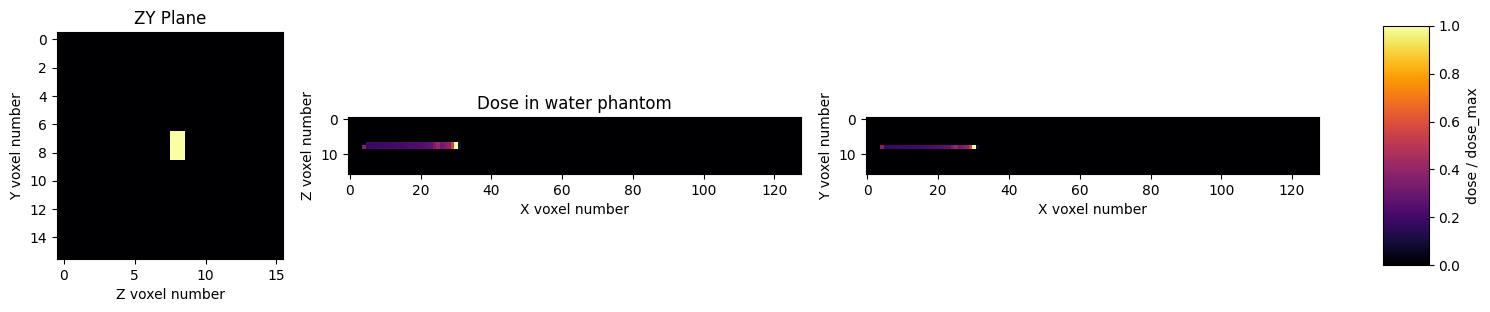

(7, 8, 18)


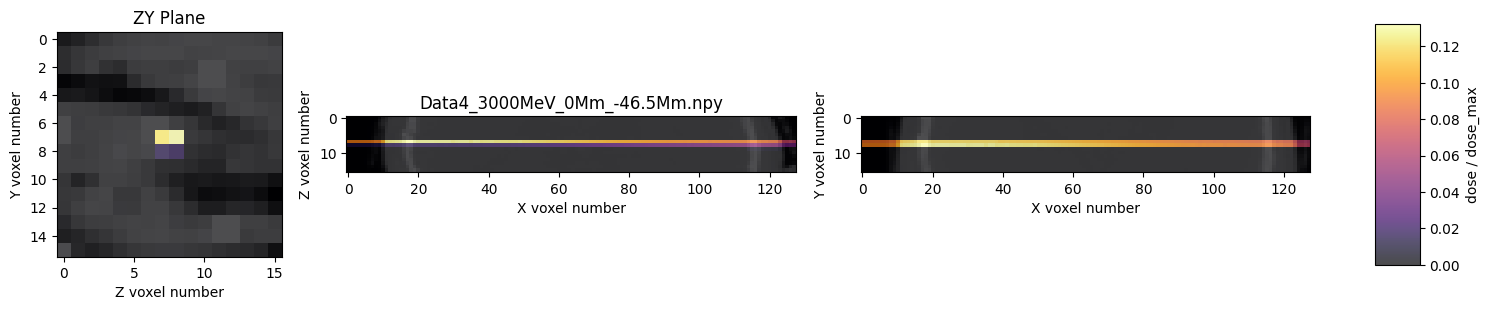

(8, 8, 93)


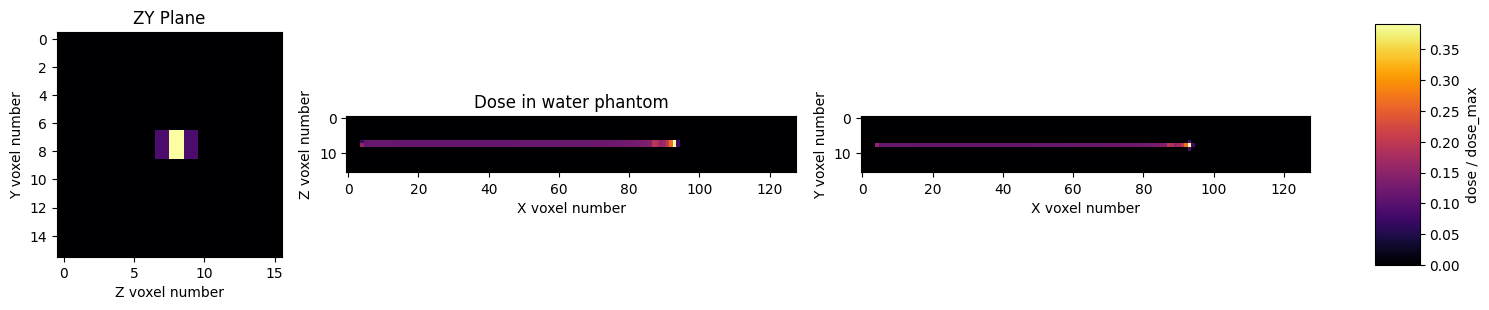

(8, 8, 22)


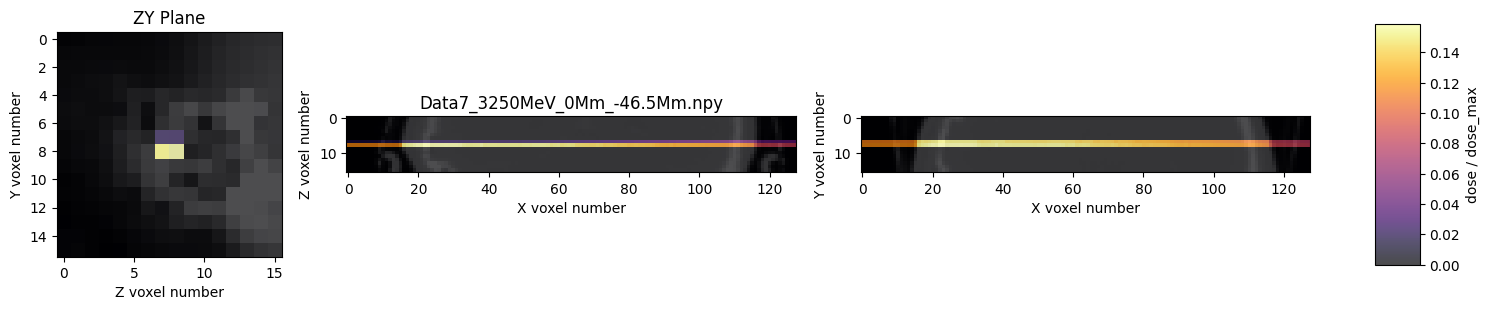

(8, 8, 106)


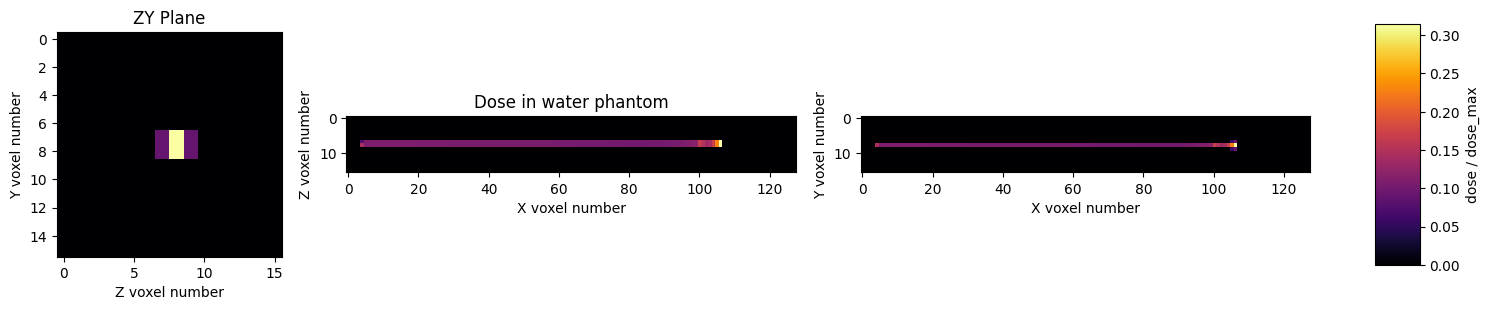

(7, 8, 20)


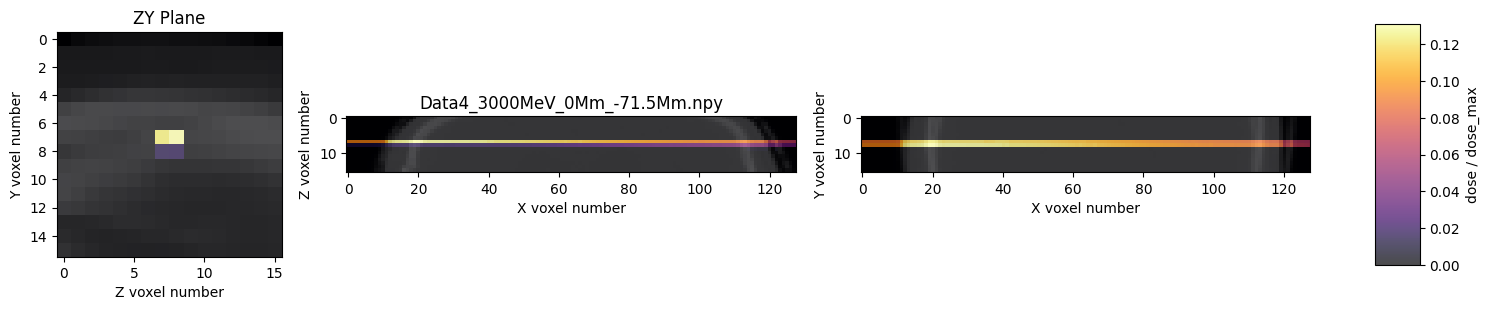

(8, 8, 93)


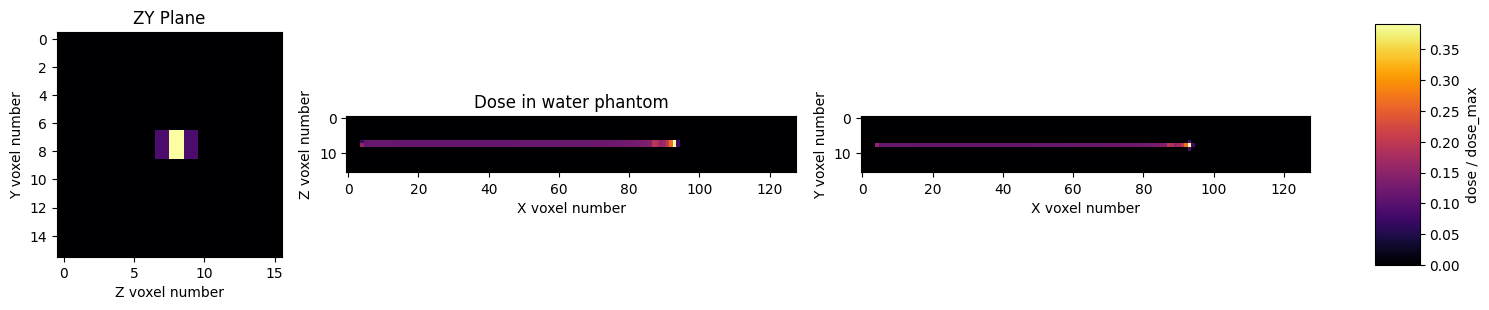

(7, 7, 99)


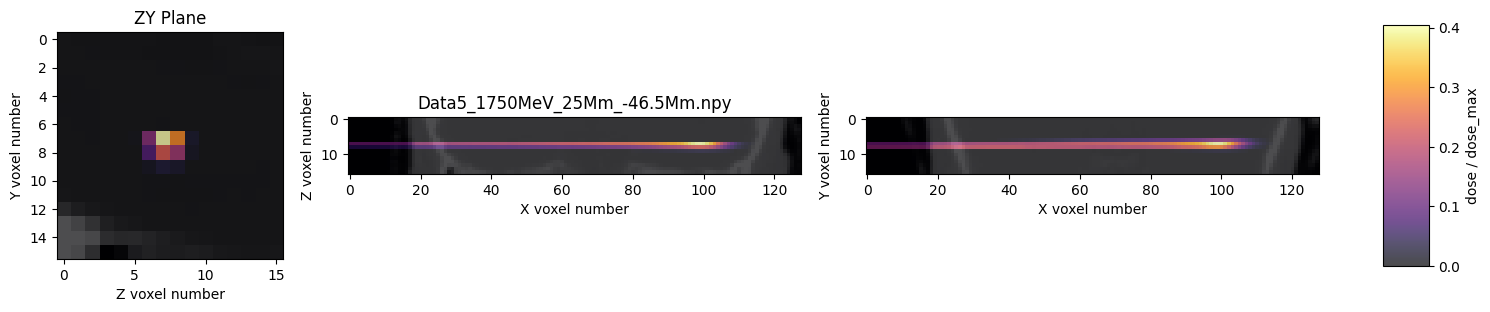

(7, 8, 39)


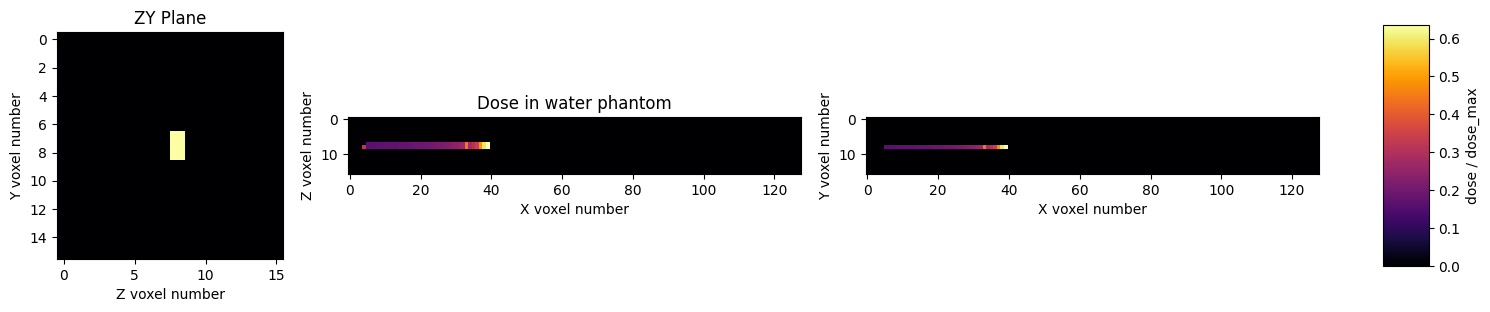

(7, 8, 86)


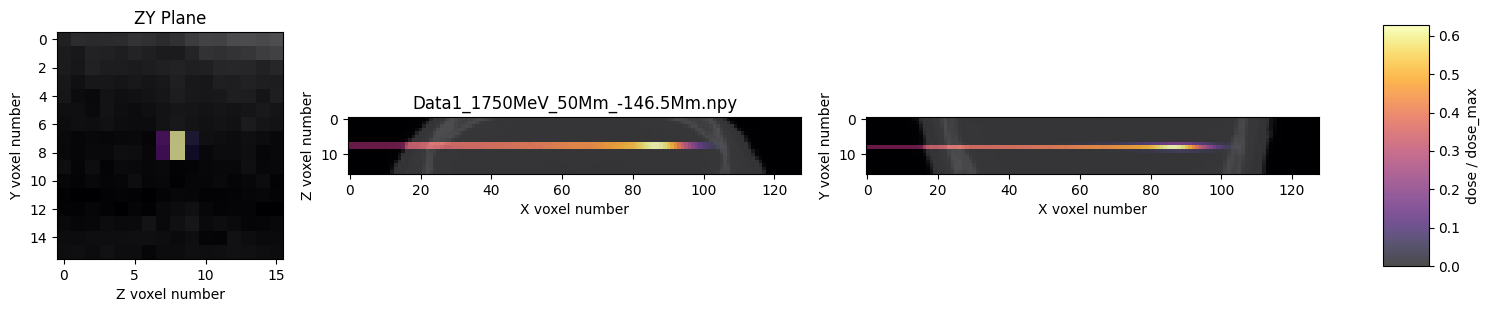

(7, 8, 39)


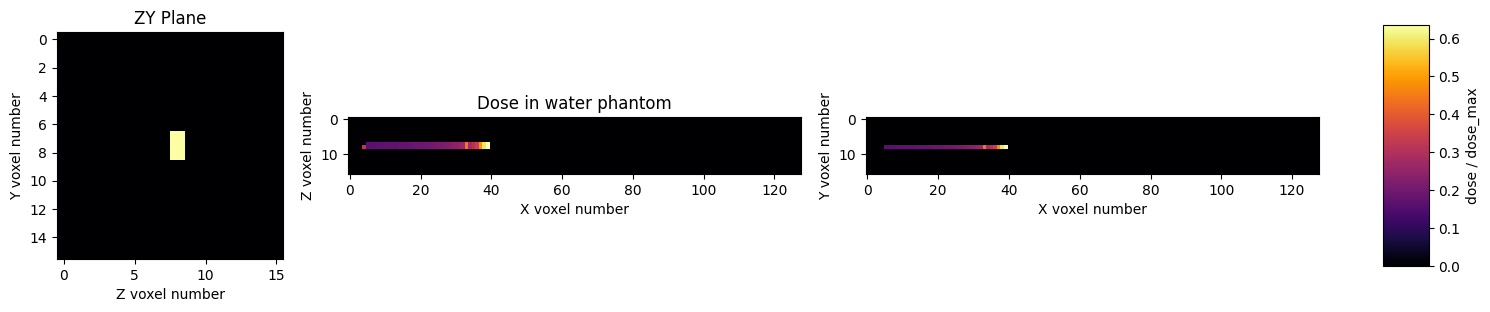

(7, 8, 50)


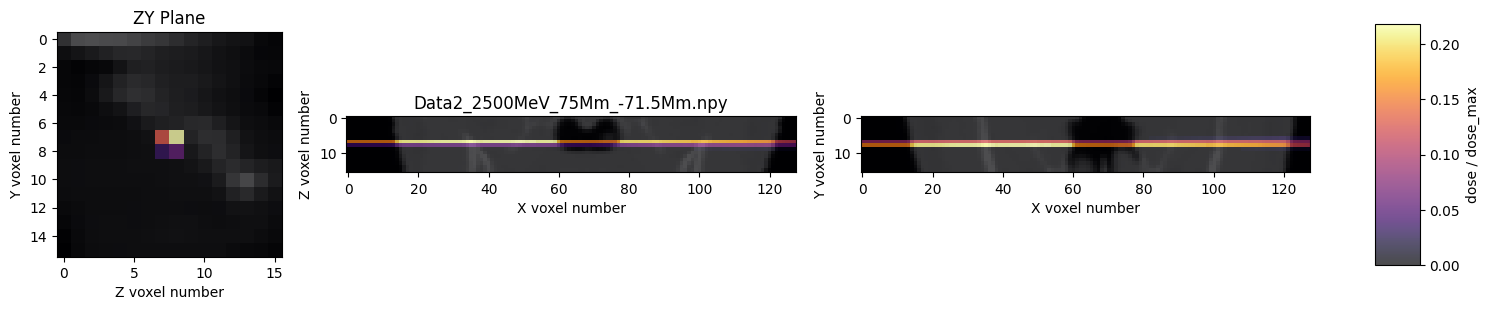

(7, 8, 69)


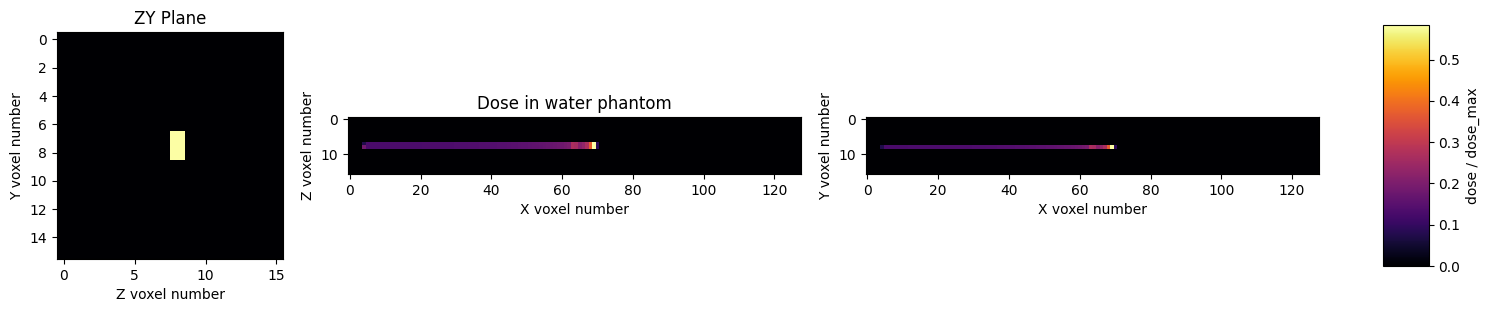

(8, 8, 32)


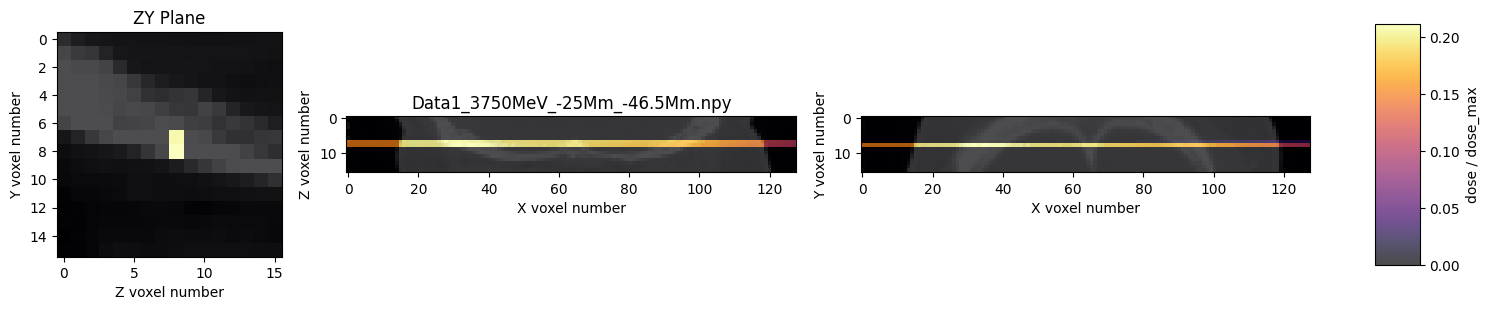

(8, 8, 4)


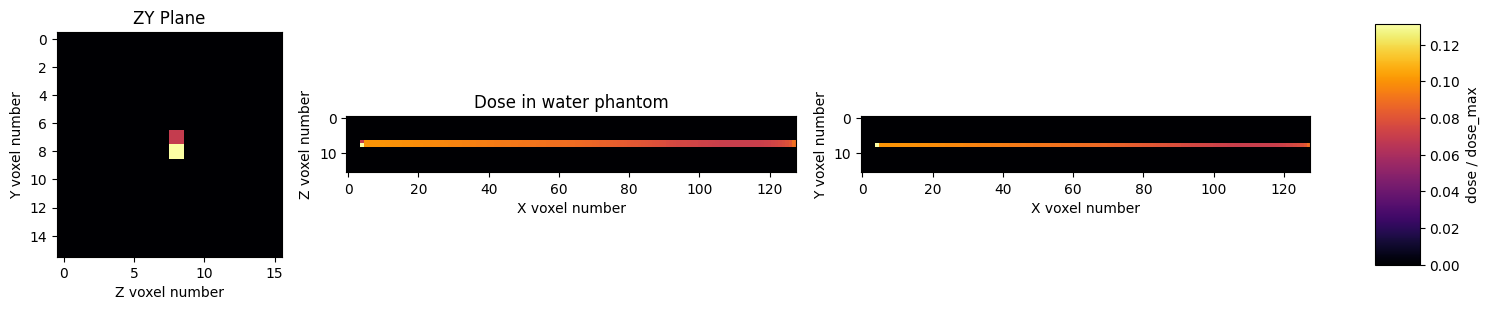

(7, 7, 75)


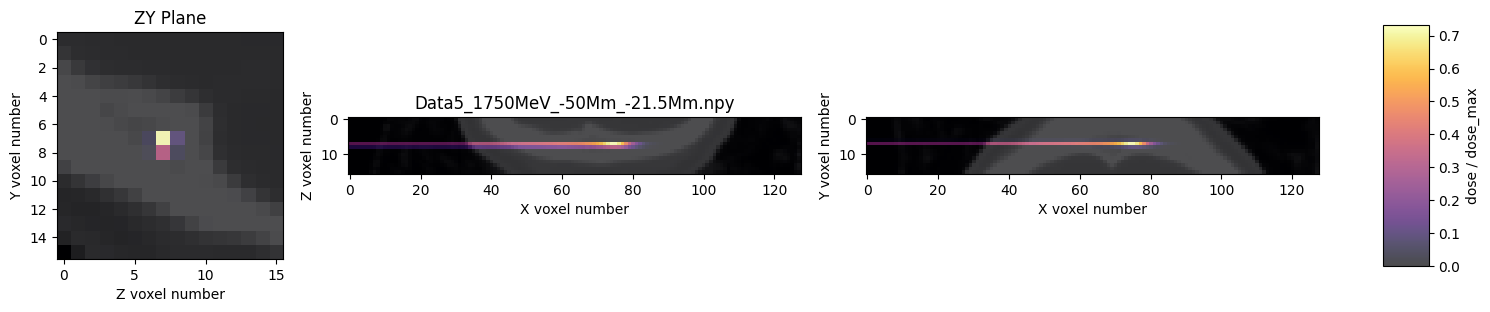

(7, 8, 39)


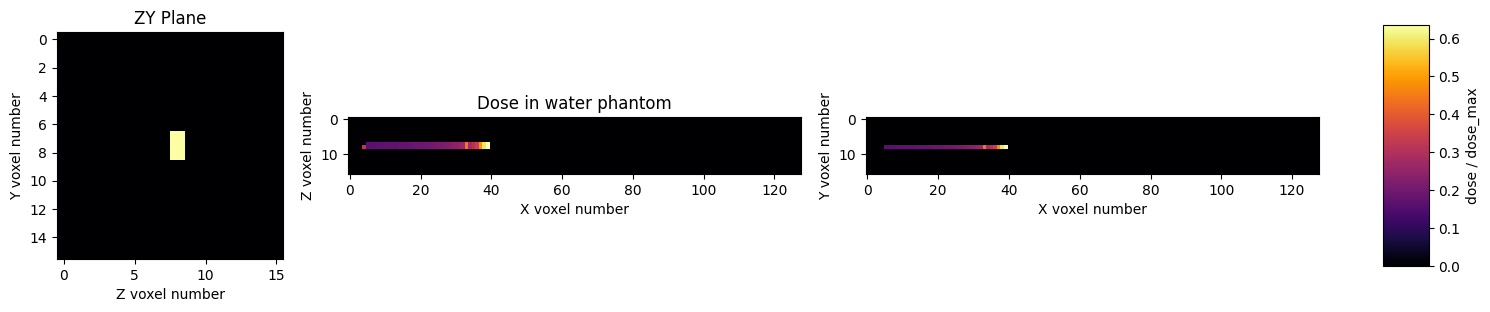

(7, 8, 92)


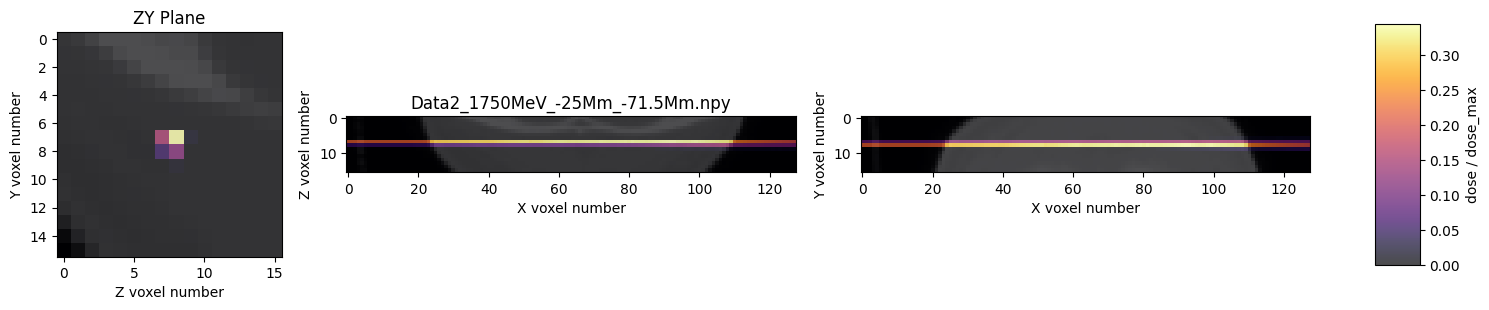

(7, 8, 39)


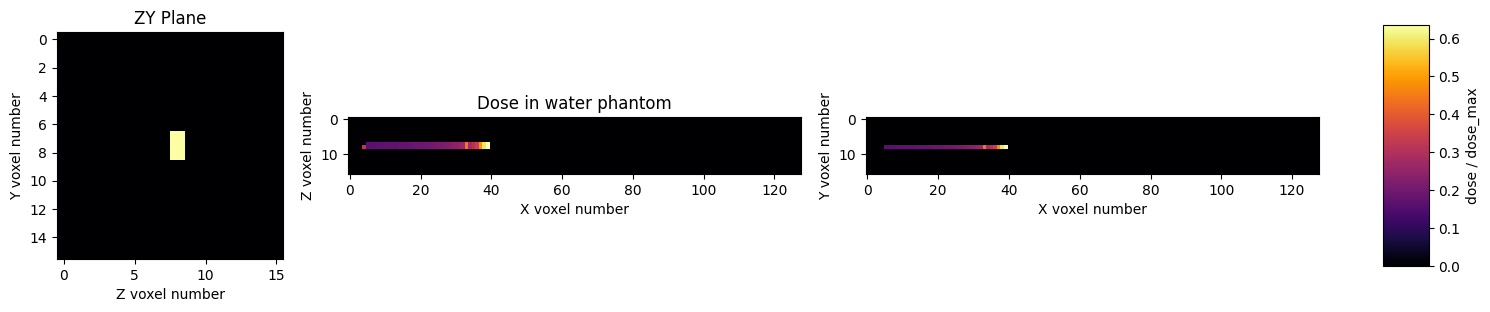

(7, 8, 20)


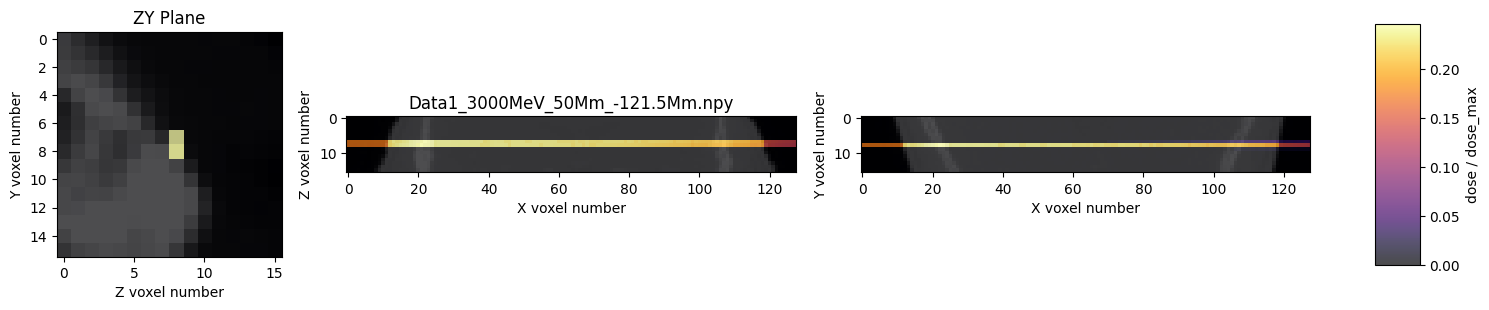

(8, 8, 93)


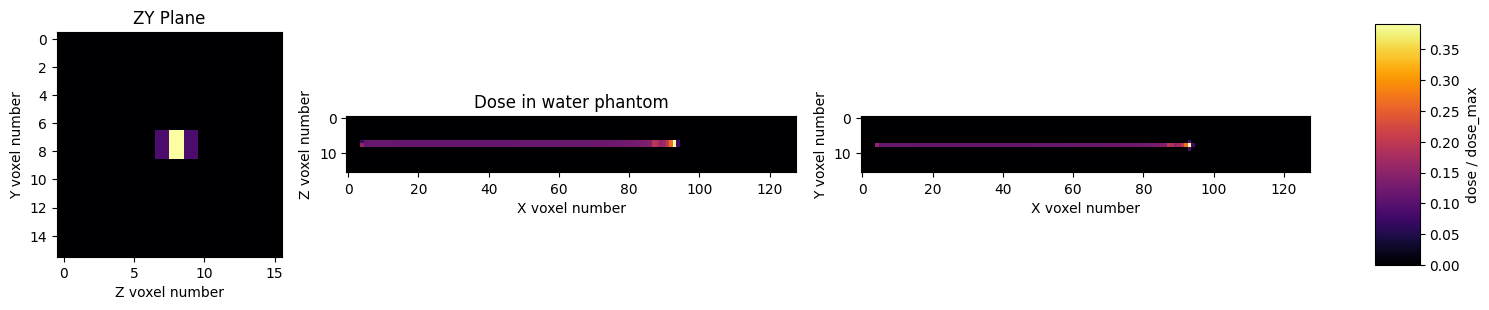

(7, 7, 21)


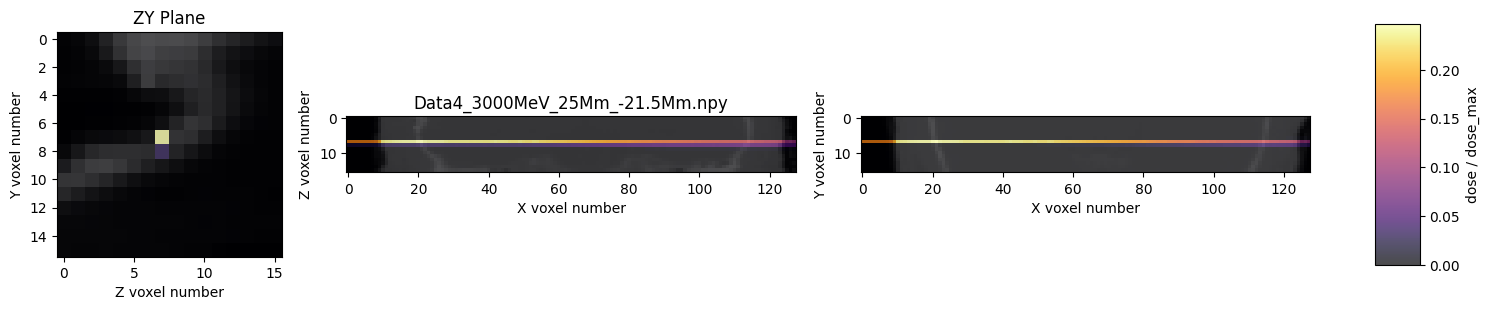

(8, 8, 93)


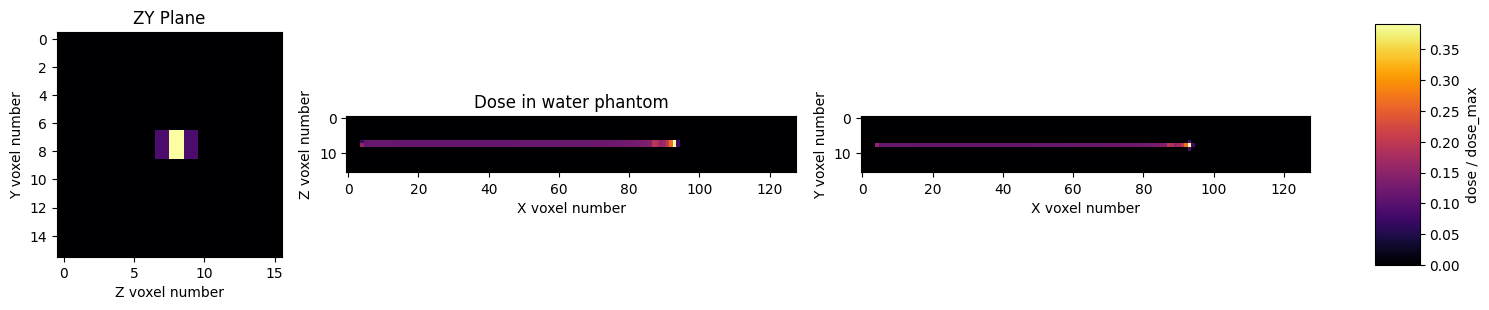

(8, 8, 59)


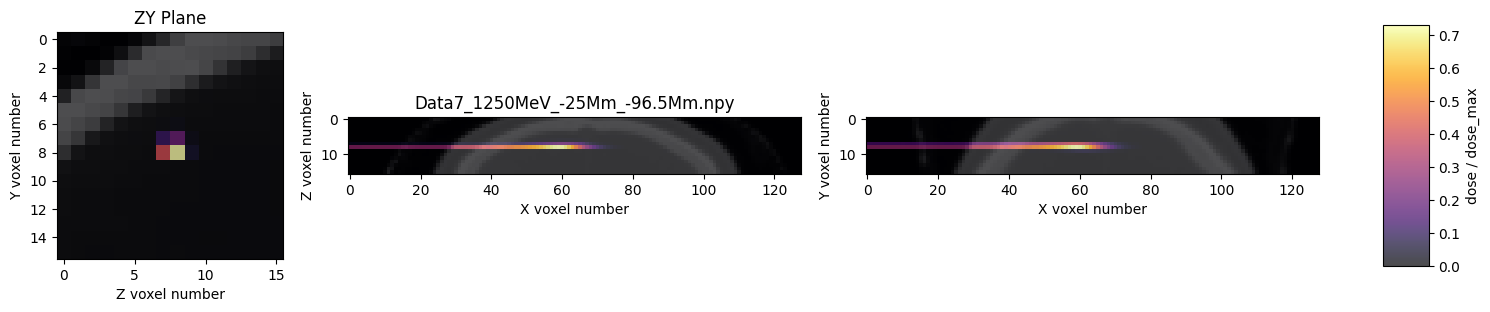

(7, 8, 23)


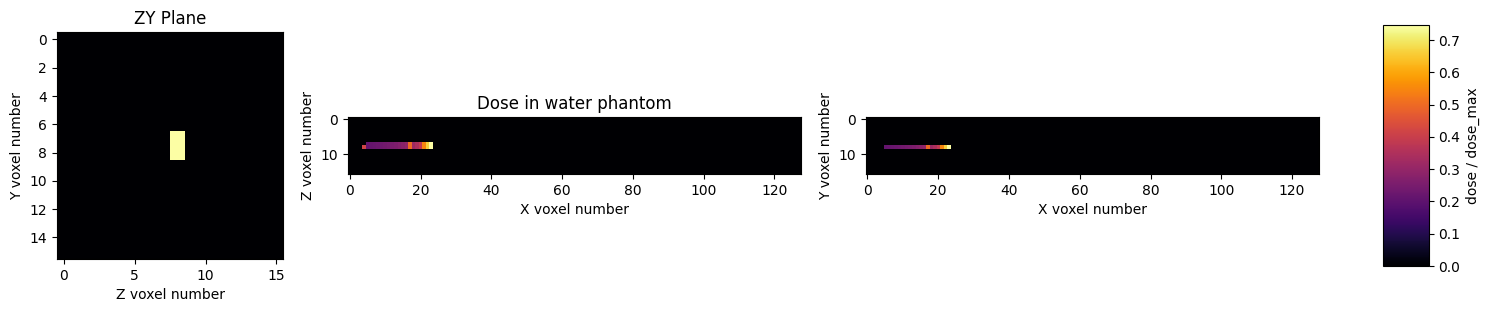

(7, 7, 84)


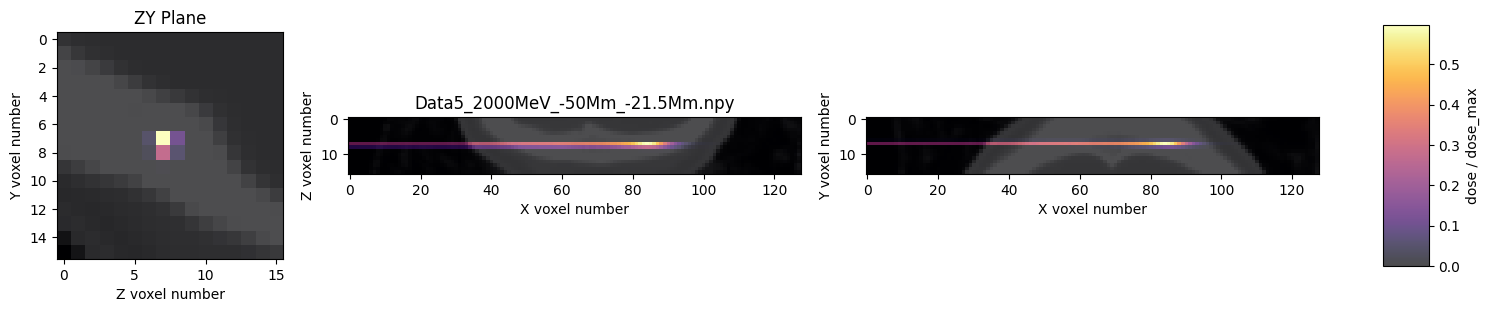

(7, 8, 48)


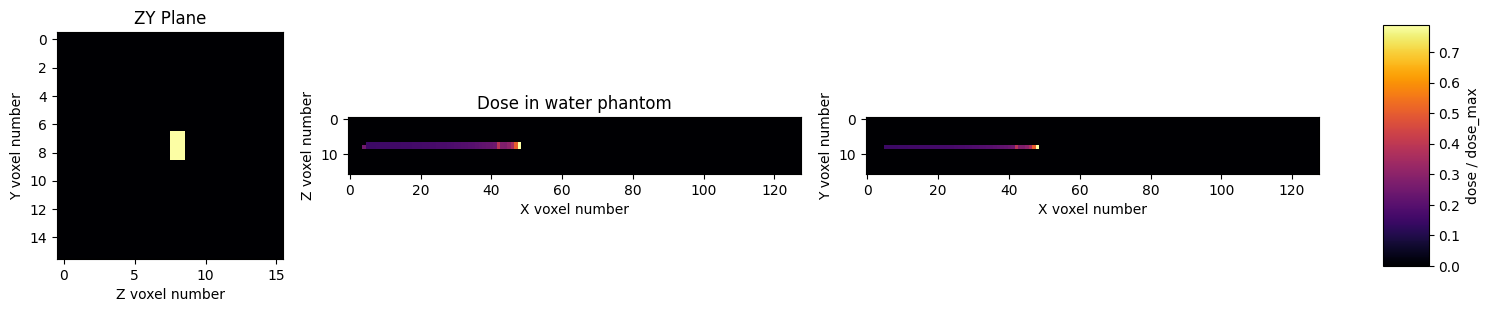

(7, 7, 24)


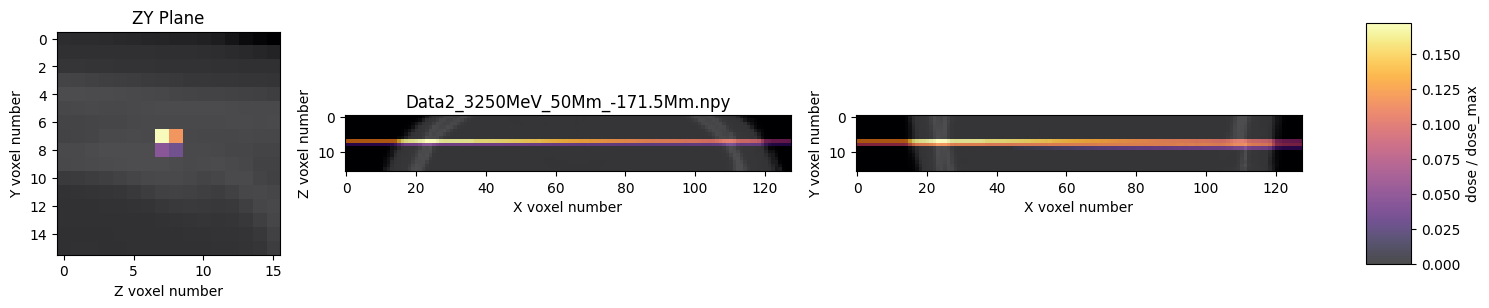

(8, 8, 106)


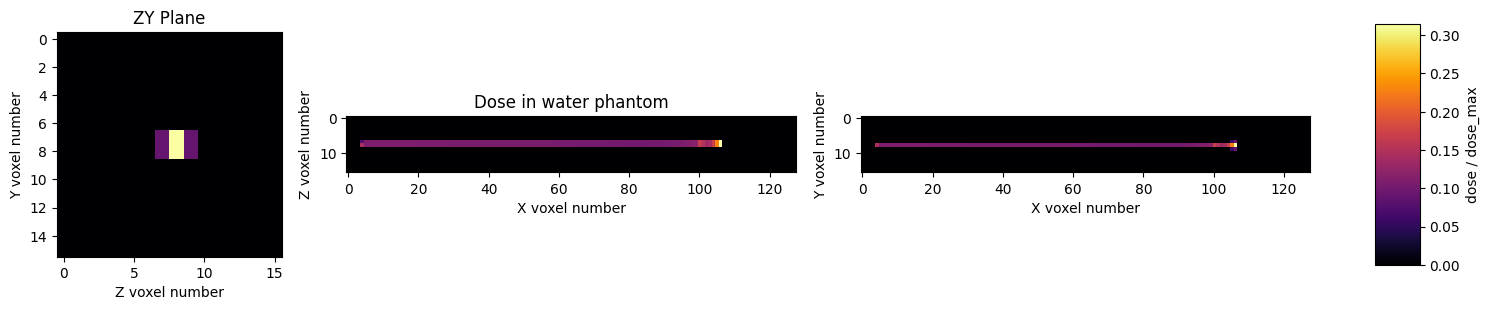

(8, 8, 111)


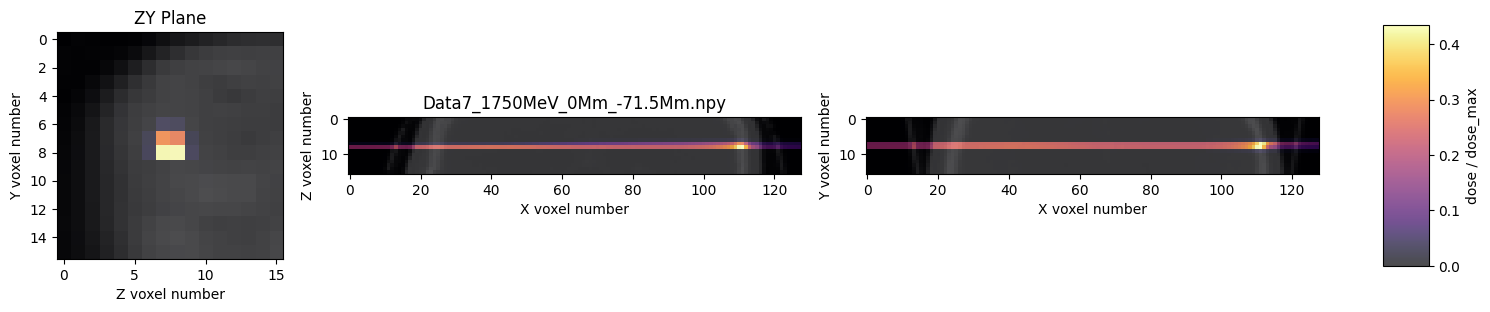

(7, 8, 39)


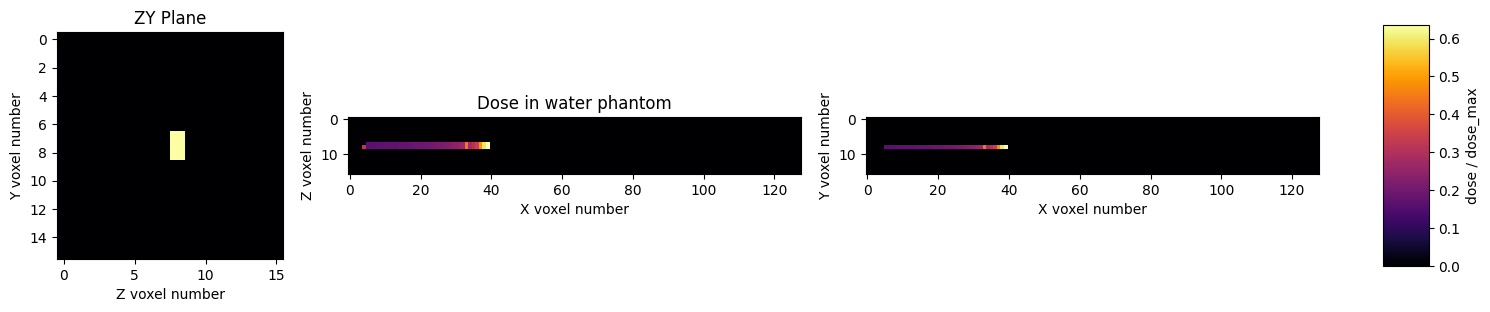

(8, 8, 38)


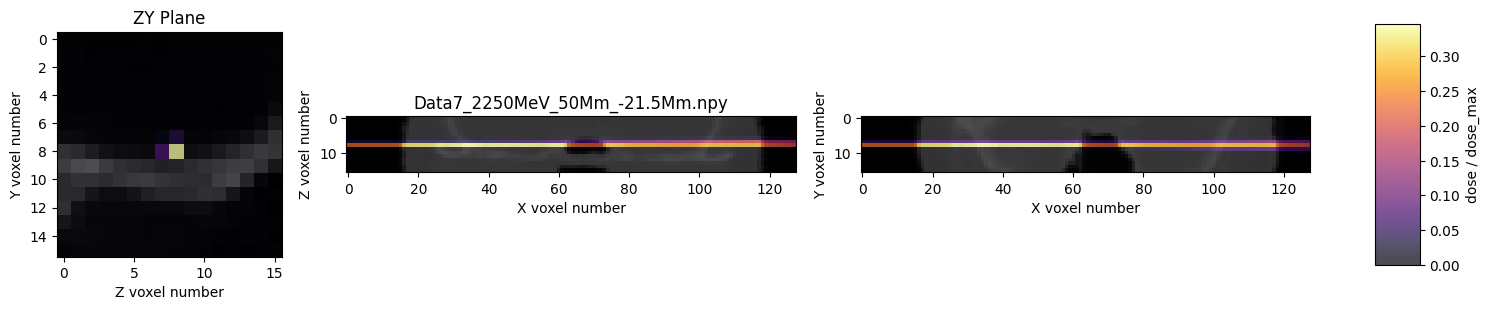

(7, 8, 58)


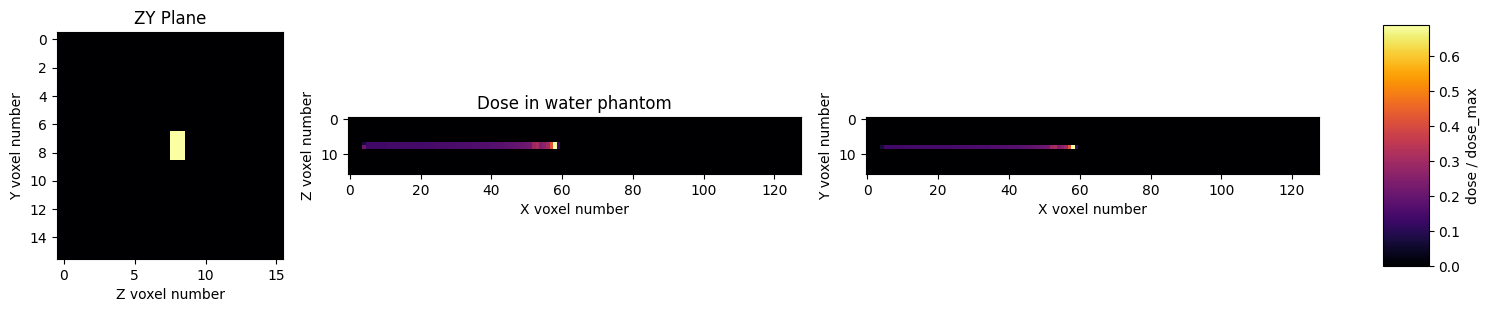

In [7]:
import torch
import matplotlib.pyplot as plt

# Define center of the volume
# center = [7,7] # z,y
# Define number of samples
n_samples = data_batch.shape[0]

for i in range(n_samples):
    data_sample = data_batch[i, 0]
    density_sample = density_batch[i, 0]
    data_name_sample = data_name_batch[i]
    # Define the figure and the grid
    fig = plt.figure(figsize=(15, 3))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 2, 2, 0.2])  # 3 plots + 1 colorbar
    max_index = np.unravel_index(data_sample.argmax(), data_sample.shape)
    print(max_index)    
    # ZY plane
    ax0 = plt.subplot(gs[0])
    ax0.imshow(density_sample[:, :, max_index[2]], cmap='gray')
    ax0.imshow(data_sample[:, :,max_index[2]], cmap='inferno', alpha=0.7)
    ax0.set_title("ZY Plane")
    ax0.set_xlabel('Z voxel number')
    ax0.set_ylabel('Y voxel number')

    # ZX plane
    ax1 = plt.subplot(gs[1])
    ax1.imshow(density_sample[:, max_index[1], :], cmap='gray')
    ax1.imshow(data_sample[:, max_index[1], :], cmap='inferno', alpha=0.7)
    ax1.set_title(data_name_sample)
    ax1.set_xlabel('X voxel number')
    ax1.set_ylabel('Z voxel number')

    # YX plane
    ax2 = plt.subplot(gs[2])
    ax2.imshow(density_sample[max_index[0], :, :], cmap='gray')
    img_data = ax2.imshow(data_sample[max_index[0], :, :], cmap='inferno', alpha=0.7)
    ax2.set_xlabel('X voxel number')
    ax2.set_ylabel('Y voxel number')

    # Colorbar
    cax = plt.subplot(gs[3])
    cbar = plt.colorbar(img_data, cax=cax)
    cbar.set_label('dose / dose_max')

    plt.tight_layout()
    plt.show()


    water_sample = water_batch[i, 0]
    # Define the figure and the grid
    fig = plt.figure(figsize=(15, 3))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 2, 2, 0.2])  # 3 plots + 1 colorbar
    max_index = np.unravel_index(water_sample.argmax(), water_sample.shape)
    print(max_index)
        
    # ZY plane
    ax0 = plt.subplot(gs[0])
    ax0.imshow(water_sample[:, :,max_index[2]], cmap='inferno', alpha=1)
    ax0.set_title("ZY Plane")
    ax0.set_xlabel('Z voxel number')
    ax0.set_ylabel('Y voxel number')

    # ZX plane
    ax1 = plt.subplot(gs[1])
    ax1.imshow(water_sample[:, max_index[1], :], cmap='inferno', alpha=1)
    ax1.set_title('Dose in water phantom')
    ax1.set_xlabel('X voxel number')
    ax1.set_ylabel('Z voxel number')

    # YX plane
    ax2 = plt.subplot(gs[2])
    img_water = ax2.imshow(water_sample[max_index[0], :, :], cmap='inferno', alpha=1)
    ax2.set_xlabel('X voxel number')
    ax2.set_ylabel('Y voxel number')

    # Colorbar
    cax = plt.subplot(gs[3])
    cbar = plt.colorbar(img_water, cax=cax)
    cbar.set_label('dose / dose_max')

    plt.tight_layout()
    plt.show()
    #plt.savefig(f'sample_{i+1}.png')  # Save each sample's image to a file
    #plt.close(fig)  # Close the figure to free up memory

# images named sample_1.png, sample_2.png, ... saved in the current directory.
